In [1]:
import pandas as pd

df = pd.read_csv("https://ec.europa.eu/eurostat/databrowser-backend/api/extraction/1.0/LIVE/true/sdmx/csv/PRC_HICP_MANR?i")


In [2]:
df = df[df["geo"] == "FR"]

In [3]:
df.drop(df.columns[:4], axis=1, inplace=True)



In [4]:
# Supprimer la deuxième colonne geo car on a que des données française
df.drop('geo', axis=1, inplace=True)

# Supprimer la dernière colonne flag parce que pas utile, en utilisant l'index -1
df.drop(df.columns[-1], axis=1, inplace=True)


In [5]:
import matplotlib.pyplot as plt


C:\Users\maxen\AppData\Local\Temp\ipykernel_3956\2156045871.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["TIME_PERIOD"] = pd.to_datetime(df_filtered["TIME_PERIOD"])


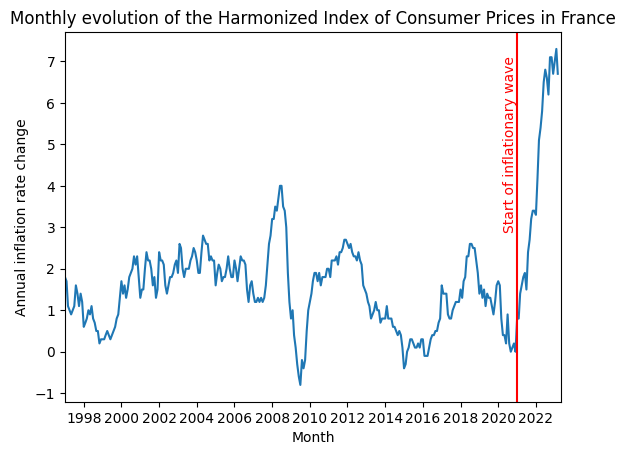

In [6]:
from datetime import date
from matplotlib.dates import YearLocator
from matplotlib.dates import date2num

# Filtrer les lignes où la valeur de la colonne "coicop" est égale à "CP00"
df_filtered = df[df["coicop"] == "CP00"]

# Convertir la colonne "TIME_PERIOD" en un objet de type date
df_filtered["TIME_PERIOD"] = pd.to_datetime(df_filtered["TIME_PERIOD"])

# Définir la colonne "TIME_PERIOD" comme l'index du DataFrame
df_filtered.set_index("TIME_PERIOD", inplace=True)

# Créer un graphique avec "TIME_PERIOD" en abscisse et "OBS_VALUE" en ordonnée
plt.plot(df_filtered.index, df_filtered["OBS_VALUE"])

# Ajouter des labels pour les axes x et y
plt.xlabel("Month")
plt.ylabel("Annual inflation rate change")

# Limiter l'affichage des valeurs de l'axe x jusqu'à mars 2023
limite_x = date(2023, 5, 1) # Créer un objet de type date pour mars 2023
plt.xlim(df_filtered.index.min(), limite_x) # Définir la limite de l'axe x

# Définir des intervalles annuels sur l'axe x
annee_locator = YearLocator(2)
plt.gca().xaxis.set_major_locator(annee_locator)

# Convertir la date "2021-01" en un nombre pour l'axe des abscisses
x_position = date2num(pd.Timestamp("2021-01"))

# Tracer une ligne verticale au moment de janvier 2021
plt.axvline(x_position, color="red")

# Add text to the graph to the left of the vertical line
plt.text(x_position - 5, 5, "Start of inflationary wave", rotation=90, fontsize=10, color="red", ha="right", va="center")

plt.title("Monthly evolution of the Harmonized Index of Consumer Prices in France")

# Afficher le graphique
plt.show()